# Implementinh Decision Trees

---
__Author Name : Shreyansh Padarha__<br>
__Email : mailto:shreyansh.padarha@hotmail.com__<br>

---

># Introduction

This notebook involves implementing Sklearn's Decision Tree Classifier with hyperparameter tuning by making use of relevant visualisations, comments and explanations wherever deemed necessary during the execution. Relevant Evaluation Metrics are used and illustrated through the execution of the lab. Comments for the same are mentioned as well. The tasks within the 


<u><b>PART A - Linear Regression Library</b></u>

Import the sklearn.tree.DecisionTreeClassifier, and perform classification on the TItanic Dataset. The train and test datasets are given separately, due to which there is no need of train_test_split function.

Comment on the accuracy of the model on prediction. Comment on the accuracy, when the following parameters are modified - Criterion (gini / entropy / log_loss), max_depth, max_leaf_nodes, and random_state

<u><b>PART B - Dummy Classifier</b></u>

Compare your results with Dummy Classifier with the following parameters - most_frequent, prior, uniform, constant, and comment on the results.

---

># Objectives 

- To understand the implementation of decison tree with regards to binary classification problems.
- To compare and tune decison tree models using different parameters.
- To understand the usage and implementation of a Dummy Classifier

---

># Problem Statement
    
Performing Classification and regression using Decison Tree, conducting a parameteric analysis on the same and understanding the use case of Dummy Classifiers.
  
---

># Method 

1. Using in-built Sklearn library methods to perform decison tree classification, and creating dummy classifiers.
2. Comparing different models of decison tree by tuning various parameters
3. Using pandas dataframe to store the results and combinations. 
4. Comparing the accuracy scores with regards to the model's changing parameters.


---

># Observatoins 

### Part A
- It can be seen that there is no gini impurity in criteria, for the highest accuracy models.
- It can also be seen that the maximum leaf nodes for the highest accuracy models are all 10.
- The ideal combination, which requires the lowest time according to me will be of the following parameters:
    1. Criteria = log_loss/entropy
    2. Max_Depth = 6
    3. Max_Leaf_Nodes = 10
    4. Random State = Any 

__Comparitive Analysis__<br>
- As the max depth of the tree increases, understandably the accuraacy of the models increase, this plateaus after 4 levels, in the case of Titanic dataset.
- From 2 to 4 leaf nodes the model accuracy decreases steadilty from 0.8 to 0.78. Post which, as the number of maximum leaf nodes increase so does the model accuracy.
- As expected, the random state values hardly affect the outcome (accuracy) of the model.
- Surprisingly, Gini Index as a method had a volatile response to parameters after a certain extent. log_loss and entropy resulted in better, stable and more efficient models.

### Part B

The ```Dummy Classifier``` is a baseline model that predicts classes using simple rules, such as the most frequent class or a random class. Our model should perform better than this baseline in order to be considered useful.<br>
Based on the dummy classifier comparitive analysis, it appears that our model (Decison Tree entropy, with 0.84 accuracy) is performing better than the Dummy Classifier in any of the strategies that were tried.

---

># Results

1. The decision treee model can be tuned with relevant parameters.
2. The decision tree model has better accuracy than dummy classifiers.


----

># References

__StatQuest by Josh__: https://www.youtube.com/watch?v=_L39rN6gz7Y<br>
__Stackoverflow__: https://stackoverflow.com<br><br>
__Sklearn__<br>
https://scikit-learn.org/stable/modules/tree.html<br>
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

---

# Importing required libraries

In [84]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import cross_val_score

import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

# Importing the dataset (train and test separately)
__About The dataset__<br>
The ```Titanic Dataset``` is a dataset curated on the basis of information about the passengers on the infamous titanic ship, like their age, class, gender, etc to predict if they would have survived or not. <br>
Although there was a major element of luck involved in surviving, its been seen through various analysises, some groups of people were more likely to survive than others.

In [2]:
#Importing required files into the dataset
df = pd.read_csv("train.csv")
df_test = pd.read_csv("titanic_sample.csv")

#Creating a subset fp
X_train = df.drop(['Survived' ,'PassengerId', 'Name', 'Ticket','Cabin'],axis=1)
y_train = df[["Survived"]]

X_test = df_test.drop(['Survived' ,'PassengerId', 'Name', 'Ticket','Cabin'],axis=1)
y_test = df_test[["Survived"]]

# Part A - Linear Regression Library
- Import the sklearn.tree.DecisionTreeClassifier, and perform classification on the Titanic Dataset.<br>
- Comment on the accuracy of the model on prediction.<br>
- Comment on the accuracy, when the following parameters are modified:
    1. Criterion (gini / entropy / log_loss)
    2. max_depth
    3. max_leaf_nodes
    4. random_state

### Label Encoding Categorical Variables
- Age (Train & Test)
- Sex (Train & Test)

In [3]:
#Label encoding Gender column for further linear regression
gender_train_le = LabelEncoder ()
gender_test_le = LabelEncoder()
X_train['Sex'] = gender_train_le.fit_transform(X_train['Sex'])
X_test['Sex'] = gender_test_le.fit_transform(X_test['Sex'])

#Label encoding Embarked column for further linear regression
embarked_train_le = LabelEncoder()
embarked_test_le = LabelEncoder()
X_train['Embarked'] = embarked_train_le.fit_transform(X_train['Embarked'])
X_test['Embarked'] = embarked_test_le.fit_transform(X_test['Embarked' ])

### Filling NA values 
As there are 177 NA values in age column in training dataset and 60 NA values in testing dataset, we will use ```.fillna()``` method of pandas to fill the NA values with the column's mean. 

In [4]:
dict(X_train.isna().sum())

{'Pclass': 0,
 'Sex': 0,
 'Age': 177,
 'SibSp': 0,
 'Parch': 0,
 'Fare': 0,
 'Embarked': 0}

In [5]:
dict(X_test.isna().sum())

{'Pclass': 0,
 'Sex': 0,
 'Age': 60,
 'SibSp': 0,
 'Parch': 0,
 'Fare': 0,
 'Embarked': 0}

In [6]:
#Replace NaNs in column Age with the mean of the column
X_train['Age'].fillna(value=X_train['Age'].mean(), inplace=True)
X_test['Age'].fillna(value=X_test['Age'].mean(), inplace=True)

### User-Defined function to calculate and make the decison tree classification based on different parametes

In [7]:
#Creating a user defined function to perform Deison Tree Models
def performDecisonTree(X_train,X_test,y_train, criteria,max_depth, random_state, max_leaf_nodes):
    tree = DecisionTreeClassifier(criterion = criteria,
                                max_depth= max_depth,
                                 random_state =  random_state,
                                max_leaf_nodes = max_leaf_nodes)
    tree.fit(X_train,y_train)
    accuracy = tree.score(X_test,y_test)
    
    return tree, accuracy

### Creating all possible parameters for testing

In [8]:
criterion_arr = ["gini", "entropy", "log_loss"]
random_state_arr = [0,10,30,42,50]
max_depth_arr = [2,3,4,6,8,10]
max_leaf_nodes_arr = [2,4,6,8,10]

### Testing using different parameters

In [9]:
df_tree = pd.DataFrame(columns = ["Criteria","Max_Depth","Max_Leaf_Nodes","Random_State","Accuracy"])

In [10]:
df_tree

,Criteria,Max_Depth,Max_Leaf_Nodes,Random_State,Accuracy


In [11]:
#Iterating throught the parameter arrays for model parameter tuning
for criteria in criterion_arr:
    for max_depth in max_depth_arr:
        for max_leaf_nodes in max_leaf_nodes_arr:
            for random_state in random_state_arr:
                storer = {}
                t, acc =performDecisonTree(X_train,X_test,y_train, 
                                           criteria,
                                           max_depth, 
                                           random_state, 
                                           max_leaf_nodes)
                
                storer = {
                        "Criteria" : criteria,
                         "Max_Depth" : max_depth,
                         "Max_Leaf_Nodes" : max_leaf_nodes,
                         "Random_State" : random_state,
                         "Accuracy" : acc,
                         }
                
                df_tree = df_tree.append(storer,ignore_index=True)

In [12]:
df_tree.sample(6)

,Criteria,Max_Depth,Max_Leaf_Nodes,Random_State,Accuracy
263,entropy,8,6,42,0.820000
87,gini,6,6,30,0.820000
412,log_loss,8,6,30,0.820000
92,gini,6,8,30,0.833333
443,log_loss,10,8,42,0.833333
234,entropy,6,4,50,0.776667


In [13]:
#Higheest Accuracy
df_tree[df_tree.Accuracy == df_tree.Accuracy.max()]

,Criteria,Max_Depth,Max_Leaf_Nodes,Random_State,Accuracy
245,entropy,6,10,0,0.843333
246,entropy,6,10,10,0.843333
247,entropy,6,10,30,0.843333
248,entropy,6,10,42,0.843333
249,entropy,6,10,50,0.843333
270,entropy,8,10,0,0.843333
271,entropy,8,10,10,0.843333
272,entropy,8,10,30,0.843333
273,entropy,8,10,42,0.843333
274,entropy,8,10,50,0.843333


__Ideal Model Tree Visualised__

Model Accuracy:  0.8433333333333334


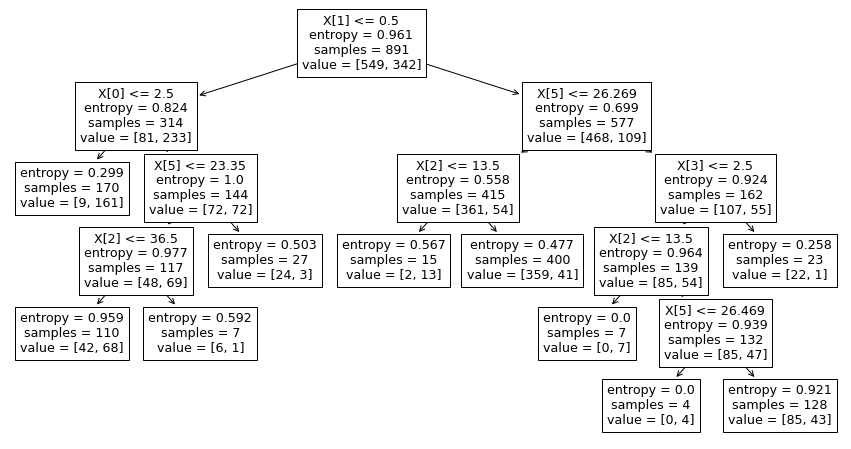

In [14]:
t,acc = performDecisonTree(X_train,X_test,y_train, "entropy",6, 0, 10)
print("Model Accuracy: ",acc)
plt.figure(figsize = (15,8))
tree.plot_tree(t)
plt.show()

__Observation__<br>
- The combinations of the parameters aabove return the highest accuracy (0,84333).
- It can be seen that there is no gini impurity in criteria, for the highest accuracy models.
- It can also be seen that the maximum leaf nodes for the highest accuracy models are all 10.
- The ideal combination, which requires the lowest time according to me will be of the following parameters:
    1. Criteria = log_loss/entropy
    2. Max_Depth = 6
    3. Max_Leaf_Nodes = 10
    4. Random State = Any 

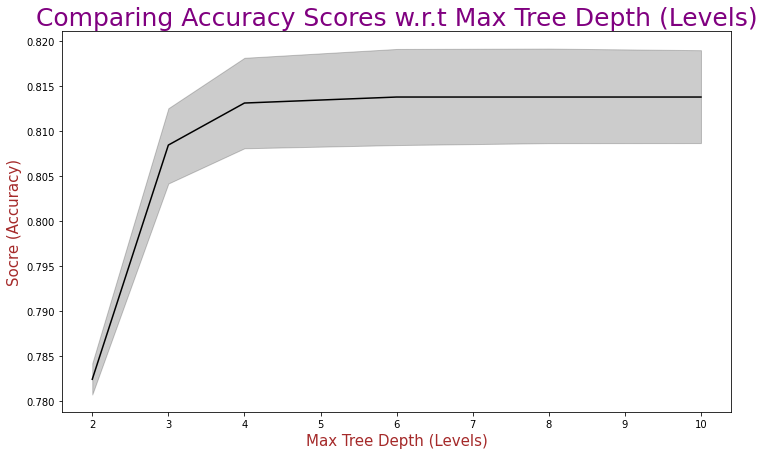

In [98]:
plt.figure(figsize = (12,7))
plt.title("Comparing Accuracy Scores w.r.t Max Tree Depth (Levels)",fontsize=25,color="purple")

sns.lineplot(data=df_tree,
            y = 'Accuracy', x ='Max_Depth',color="black")

plt.ylabel("Socre (Accuracy)",fontsize=15,color="brown")
plt.xlabel("Max Tree Depth (Levels)",fontsize=15,color="brown")

plt.show()

__Observation__<br>
- As the max depth of the tree increases, understandably the accuraacy of the models increase, this plateaus after 4 levels, in the case of Titanic dataset.

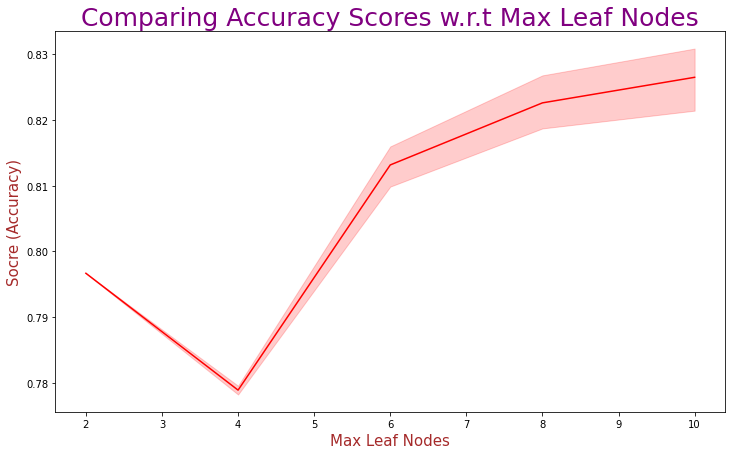

In [99]:
plt.figure(figsize = (12,7))
plt.title("Comparing Accuracy Scores w.r.t Max Leaf Nodes",fontsize=25,color="purple")

sns.lineplot(data=df_tree,
            y = 'Accuracy', x ='Max_Leaf_Nodes',color="red")

plt.ylabel("Socre (Accuracy)",fontsize=15,color="brown")
plt.xlabel("Max Leaf Nodes",fontsize=15,color="brown")

plt.show()

__Observation__<br>
- From 2 to 4 leaf nodes the model accuracy decreases steadilty from 0.8 to 0.78. Post which, as the number of maximum leaf nodes increase so does the model accuracy.

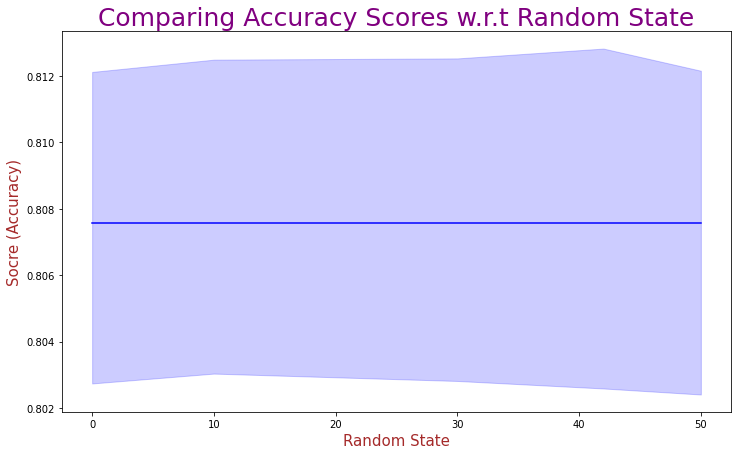

In [101]:
plt.figure(figsize = (12,7))
plt.title("Comparing Accuracy Scores w.r.t Random State",fontsize=25,color="purple")

sns.lineplot(data=df_tree,
            y = 'Accuracy', x ='Random_State',color="blue")

plt.ylabel("Socre (Accuracy)",fontsize=15,color="brown")
plt.xlabel("Random State",fontsize=15,color="brown")

plt.show()

__Observation__<br>
- As expected, the random state values hardly affect the outcome (accuracy) of the model.

Text(0.5, 0, 'Max Tree Depth (Levels)')

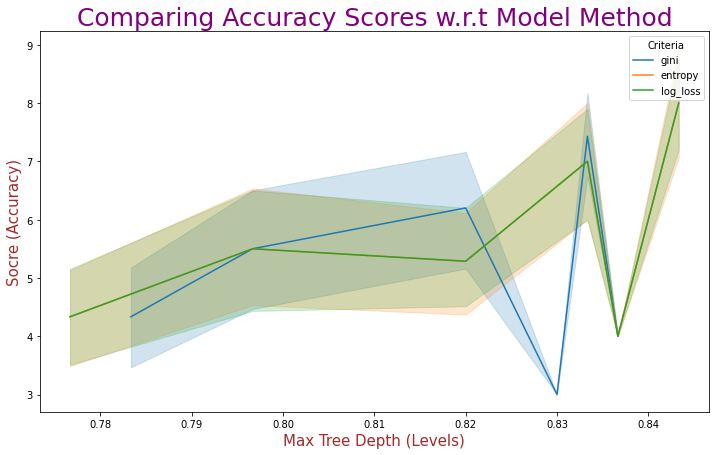

In [110]:
plt.figure(figsize = (12,7))
plt.title("Comparing Accuracy Scores w.r.t Model Method",fontsize=25,color="purple")

sns.lineplot(data=df_tree, x='Accuracy', y='Max_Depth',hue="Criteria")

plt.ylabel("Socre (Accuracy)",fontsize=15,color="brown")
plt.xlabel("Max Tree Depth (Levels)",fontsize=15,color="brown")

__Observation__<br>
- Surprisingly, Gini Index as a method had a volatile response to parameters after a certain extent. log_loss and entropy resulted in better, stable and more efficient models.

---
# PART B - Dummy Classifier
Comparing results with Dummy Classifier with the following parameters:
1. most_frequent
2. prior
3. uniform
4. constant

In [34]:
df_dummy = pd.DataFrame(columns = ['Strategy','Score','Constant'])
df_dummy

,Strategy,Score,Constant


In [35]:
from sklearn.dummy import DummyClassifier
strategy_arr = ["most_frequent","prior","uniform"]

for strat in strategy_arr:  
    dummy_clf = DummyClassifier(strategy = strat)
    dummy_clf.fit(X_train,y_train)
    score = dummy_clf.score(X_test, y_test)
    df_dummy = df_dummy.append({"Strategy" : strat,
                    "Score" : score},
                    ignore_index = True)

In [36]:
constants_arr = [0,1]
for const in constants_arr:
        dummy_clf = DummyClassifier(strategy = "constant",constant=const)
        dummy_clf.fit(X_train,y_train)
        score = dummy_clf.score(X_test, y_test)
        df_dummy = df_dummy.append({"Strategy" : "constant",
                    "Score" : score,"Constant" : const},
                    ignore_index = True)
        dummy_clf = None

In [37]:
df_dummy

,Strategy,Score,Constant
0,most_frequent,0.600000,NaN
1,prior,0.600000,NaN
2,uniform,0.493333,NaN
3,constant,0.600000,0
4,constant,0.400000,1


Text(0.5, 0, 'Dummy Clasifier Strategy / Model')

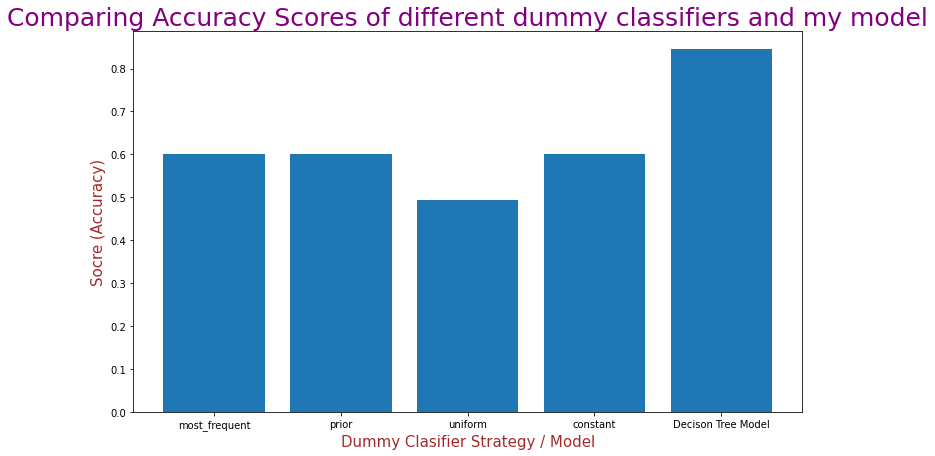

In [83]:
plt.figure(figsize = (12,7))
plt.title("Comparing Accuracy Scores of different dummy classifiers and my model",fontsize=25,color="purple")
arr_plot = df_dummy.Strategy.to_list()
arr_plot.append("Decison Tree Model")

arr_scores = df_dummy.Score.to_list()
arr_scores.append(0.8444)

plt.bar(x= arr_plot,height = arr_scores)

plt.ylabel("Socre (Accuracy)",fontsize=15,color="brown")
plt.xlabel("Dummy Clasifier Strategy / Model",fontsize=15,color="brown")

__Observation__<br>

The ```Dummy Classifier``` is a baseline model that predicts classes using simple rules, such as the most frequent class or a random class. Our model should perform better than this baseline in order to be considered useful.<br>
Based on the dummy classifier comparitive analysis, it appears that our model (Decison Tree entropy, with 0.84 accuracy) is performing better than the Dummy Classifier in any of the strategies that were tried.

---